<a href="https://colab.research.google.com/github/AhmedAboushanab/Free-Work/blob/main/Lecture_5_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Linear Regression
import pandas as pd

In [3]:
#Loading the data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/height_weight_sex/height_weight_sex.tsv', sep = '\t')
df.head()

,Sex,Height_cm,Weight_kg
0,Male,177.392292,62.743209
1,Female,171.369067,50.258795
2,Male,181.652967,69.886259
3,Male,170.961674,64.599669
4,Male,168.711097,62.672186


In [4]:
#Performing the Linear Regression (Weight vs Height)

#Importing the library used estimating the statistical models
import statsmodels.api as sm

#Adding a constant term for the intercept to the height data
x_height = sm.add_constant(df['Height_cm'])

#Defining the dependent variable
y_weight = df['Weight_kg']

#Fitting the linear regression model (Ordinary Least Squares [OLS])
model_height = sm.OLS(y_weight, x_height).fit()

#Displaying the summary of the regression
print(model_height.summary())


                            OLS Regression Results                            
Dep. Variable:              Weight_kg   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     2069.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          1.62e-245
Time:                        14:30:32   Log-Likelihood:                -3069.2
No. Observations:                1000   AIC:                             6142.
Df Residuals:                     998   BIC:                             6152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -78.5790      3.017    -26.046      0.0

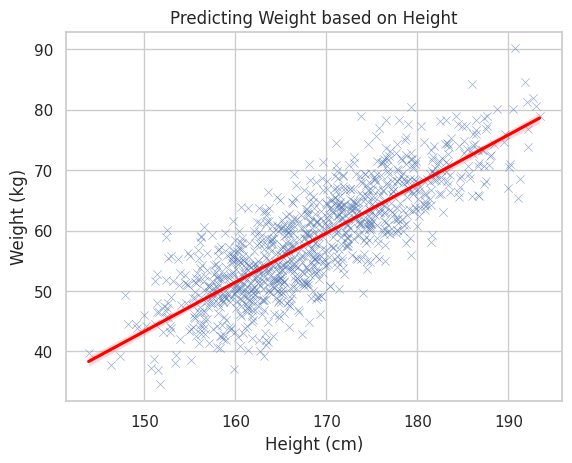

In [5]:
#Visualizing the Linear Regression (Weight vs Height)
import matplotlib.pyplot as plt
import seaborn as sns

#Setting the aesthetic style of the plots
sns.set(style = 'whitegrid')

#Creating a scatter plot of height vs. weight
sns.scatterplot(x = 'Height_cm', y = 'Weight_kg', data = df, alpha = 0.6, marker = 'x')

#Adding the linear regression line to the plot
sns.regplot(x = 'Height_cm', y = 'Weight_kg', data = df, scatter = False, color = 'red')

#Adding title and labels to the plot
plt.title('Predicting Weight based on Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

#Showing the plot
plt.show()

In [6]:
#Performing the Linear Regression (Weight vs. Height and Sex)
#Converting the 'Sex' variable to a numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

#Adding a constant term for the intercept
x_height_sex = sm.add_constant(df_encoded[['Height_cm', 'Sex_Male']])

#Fitting the linear regression model
model_height_sex = sm.OLS(y_weight, x_height_sex).fit()

#Displaying the summary of the regression
print(model_height_sex.summary())

                            OLS Regression Results                            
Dep. Variable:              Weight_kg   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1139.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          2.83e-258
Time:                        14:46:16   Log-Likelihood:                -3035.7
No. Observations:                1000   AIC:                             6077.
Df Residuals:                     997   BIC:                             6092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.6510      4.015    -13.859      0.0

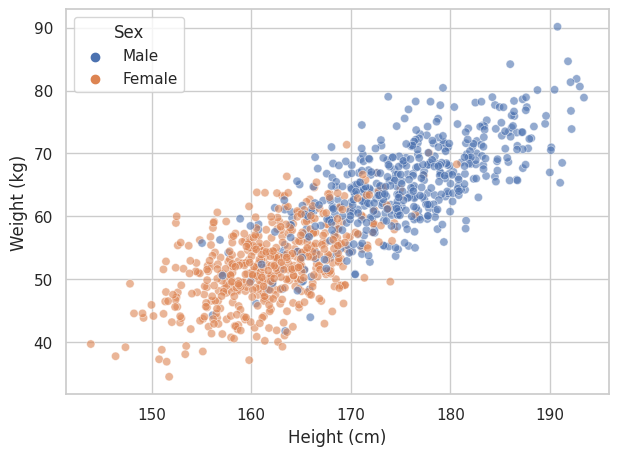

In [8]:
#Visualizing the Linear Regression (Weight vs. Height and Sex)
plt.figure(figsize=(7, 5))

#Creating separate scatter plots for males and females
sns.scatterplot(x = 'Height_cm', y = 'Weight_kg', hue = 'Sex', data = df, alpha = 0.6)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

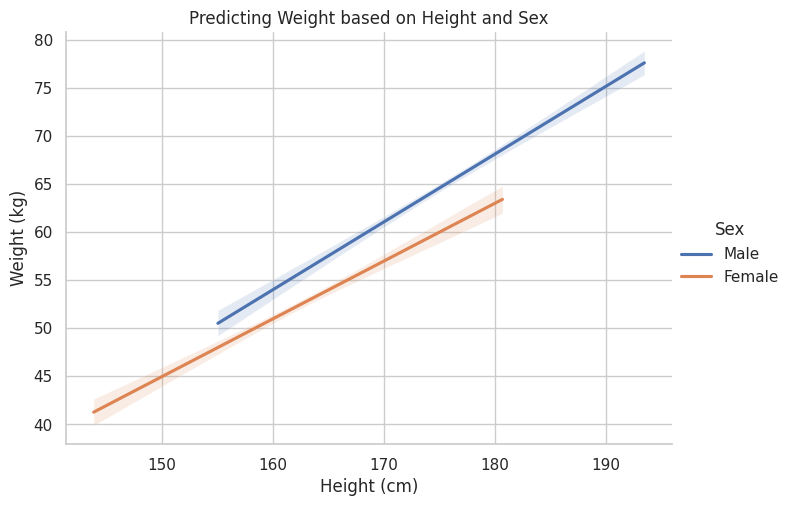

In [9]:
#Creating regression line for each sex
sns.lmplot(x = 'Height_cm', y = 'Weight_kg', hue = 'Sex', data = df, scatter = False, height = 5, aspect = 7/5)

#Adding title and labels to the plot
plt.title('Predicting Weight based on Height and Sex')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [11]:
#GWAS in python
#Load the genotyping data
genotyping_data = pd.read_csv('https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/height_weight_sex/snps.tsv', sep = '\t')
#genotyping_data.head()
genotyping_data.iloc[ :6, :6]

,1_SNP1,1_SNP2,1_SNP3,1_SNP4,1_SNP5,1_SNP6
0,1,2,2,1,0,0
1,1,0,2,0,1,0
2,1,2,0,2,2,1
3,1,2,0,0,2,0
4,2,1,1,0,0,1
5,1,1,1,0,0,0


In [12]:
#Load the SNP to chromosome mapping
snp_chromosome_mapping = pd.read_csv('https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/height_weight_sex/snp_chromosome.tsv', sep = '\t')
snp_chromosome_mapping.head()

,SNP,Chromosome
0,1_SNP1,1
1,1_SNP2,1
2,1_SNP3,1
3,1_SNP4,1
4,1_SNP5,1


In [14]:
#Concatenate phenotype and genotype data
data = pd.concat([df, genotyping_data], axis = 1)
#data.head()
data.iloc[ :6, :6]

,Sex,Height_cm,Weight_kg,1_SNP1,1_SNP2,1_SNP3
0,Male,177.392292,62.743209,1,2,2
1,Female,171.369067,50.258795,1,0,2
2,Male,181.652967,69.886259,1,2,0
3,Male,170.961674,64.599669,1,2,0
4,Male,168.711097,62.672186,2,1,1
5,Female,157.933708,50.568717,1,1,1


In [17]:
#Perform GWAS for each SNP
results = []
for snp in genotyping_data.columns:
  model = sm.OLS(data['Height_cm'], sm.add_constant(data[snp]))
  results.append(model.fit())

In [19]:
# Create a summary DataFrame
gwas_results = pd.DataFrame({
    'SNP': genotyping_data.columns,
    'Beta': [result.params[1] for result in results],
    'Pvalue': [result.pvalues[1] for result in results]
})
gwas_results.head()

,SNP,Beta,Pvalue
0,1_SNP1,-0.338342,0.380312
1,1_SNP2,0.299113,0.431584
2,1_SNP3,-0.046088,0.902433
3,1_SNP4,-0.149066,0.692708
4,1_SNP5,-0.507834,0.178007


In [20]:
import numpy as np
#Calculate the negative logarithm of the p-values
gwas_results['neg_log10_Pvalue'] = -np.log10(gwas_results['Pvalue'])

gwas_results.head()

,SNP,Beta,Pvalue,neg_log10_Pvalue
0,1_SNP1,-0.338342,0.380312,0.419860
1,1_SNP2,0.299113,0.431584,0.364934
2,1_SNP3,-0.046088,0.902433,0.044585
3,1_SNP4,-0.149066,0.692708,0.159450
4,1_SNP5,-0.507834,0.178007,0.749562


In [22]:
#Merge with SNP to chromosome mapping
gwas_results = pd.merge(gwas_results, snp_chromosome_mapping, on = 'SNP')
gwas_results.head()

,SNP,Beta,Pvalue,neg_log10_Pvalue,Chromosome
0,1_SNP1,-0.338342,0.380312,0.419860,1
1,1_SNP2,0.299113,0.431584,0.364934,1
2,1_SNP3,-0.046088,0.902433,0.044585,1
3,1_SNP4,-0.149066,0.692708,0.159450,1
4,1_SNP5,-0.507834,0.178007,0.749562,1


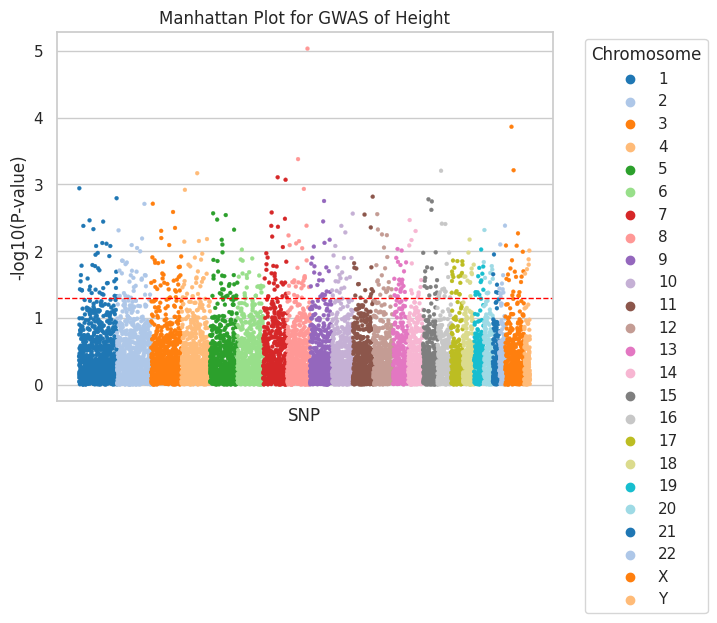

In [23]:
#Create a Manhattan plot
sns.scatterplot(data = gwas_results, x = 'SNP', y = 'neg_log10_Pvalue',
                hue = 'Chromosome', palette = 'tab20', edgecolor = None, s = 8)
plt.axhline(-np.log10(0.05), color = 'red', linestyle = 'dashed',
            linewidth = 1)
plt.xticks([])
plt.xlabel('SNP')
plt.ylabel('-log10(P-value)')
plt.title('Manhattan Plot for GWAS of Height')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           title = 'Chromosome')
plt.show()

In [25]:
#Filter for significant p-values
gwas_results[gwas_results['Pvalue'] < 0.05].sort_values(by = 'Pvalue')

,SNP,Beta,Pvalue,neg_log10_Pvalue,Chromosome
5060,8_SNP451,-1.669747,0.000009,5.033032,8
9579,X_SNP137,1.429349,0.000137,3.862223,X
4851,8_SNP242,1.323710,0.000419,3.377868,8
9626,X_SNP184,-1.300625,0.000615,3.211281,X
8019,16_SNP81,-1.262674,0.000626,3.203212,16
...,...,...,...,...,...
8218,16_SNP280,-0.743034,0.049430,1.306006,16
4602,7_SNP523,0.753347,0.049581,1.304681,7
3180,5_SNP279,0.742327,0.049761,1.303110,5
4935,8_SNP326,-0.749265,0.049897,1.301929,8


In [26]:
import numpy as np
from statsmodels.stats.multitest import multipletests

#Adjust for multiple testing (FDR correction)
gwas_results['Adjusted_Pvalue'] = multipletests(gwas_results['Pvalue'],
                                                method = 'fdr_bh')[1]

#Calculate the negative logarithm of the adjusted p-values
gwas_results['neg_log10_Adjusted_Pvalue'] = -np.log10(gwas_results['Adjusted_Pvalue'])
gwas_results.head()

,SNP,Beta,Pvalue,neg_log10_Pvalue,Chromosome,Adjusted_Pvalue,neg_log10_Adjusted_Pvalue
0,1_SNP1,-0.338342,0.380312,0.419860,1,0.993286,0.002926
1,1_SNP2,0.299113,0.431584,0.364934,1,0.993286,0.002926
2,1_SNP3,-0.046088,0.902433,0.044585,1,0.998907,0.000475
3,1_SNP4,-0.149066,0.692708,0.159450,1,0.993509,0.002828
4,1_SNP5,-0.507834,0.178007,0.749562,1,0.990480,0.004154


In [27]:
#Filter for significant p-values
gwas_results[gwas_results['Adjusted_Pvalue'] < 0.05].sort_values( by = 'Adjusted_Pvalue')

,SNP,Beta,Pvalue,neg_log10_Pvalue,Chromosome,Adjusted_Pvalue,neg_log10_Adjusted_Pvalue
